## Análise Explanatória do dataset utilizado na Atividade 01
*Durante a atividade 01 vocês apresentaram insights e explorações sobre o conjunto de dados, que tal agora apresentar os motivos destas terem acontecidos?*

*O desafio desta vez é **EXPLICAR** os motivos de três insights apresentados, baseado em dados e figuras com annotations plots. É uma análise mais detalhada, adicioando motivos à exploração.*

### Informações sobre o Dataset
Este dataset foi coletado por meio de uma pesquisa realizada no Google Forms com estudantes universitários na Malásia, a fim de examinar sua situação acadêmica atual e sua saúde mental. As informações são sobre estudantes acadêmicos de diferentes idades, gêneros, cursos e ano letivo, que possuem ou não algum tipo de transtorno mental como depressão, ansiedade ou ataque de pânico. O conjunto de dados aqui apresentado também trás informações sobre qualidade de sono, nível de stress, engagamento academico, quantidade de horas de estudo por semana e se esses estudantes tem algum tipo de suporte aos seus episódios de transtornos mentais e se fazem acompanhamento com algum especialista.

A estrutura desse dataset é formada por 16 colunas onde:

- 11 são do tipo int64
- 1 é do tipo float64
- 4 são do tipo String

Em relação aos dados, o dataset original não possui valores nulos porém possui alguns valores inválidos, duplicados ou com espaços em branco.

Este dataset possui algumas informações que precisam ser tratadas para um melhor aproveitamento, como por exemplo:

- Ano letivo possui mais de uma forma representando a mesma informação. Como exemplo, temos 'Year 3' que também pode ser encontrado na forma 'year 3', e o mesmo acontece com outros anos letivos.
- Alguns cursos estão sendo apresentados de forma abreviada dando um entendimento que é um curso diferente, quando não é. Um exemplo que podemos encontrar é o curso 'engineering' que também está sendo apresentado nas formas 'engine' e 'engin'.

*Fonte: [https://www.kaggle.com/datasets/junnn0126/university-students-mental-health](https://www.kaggle.com/datasets/junnn0126/university-students-mental-health)*

### Importação e Tratamento dos Dados

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('mentalhealth_dataset.csv')

In [2]:
# Padronização YearOfStudy
df['YearOfStudy'] = (
    df['YearOfStudy']
    .str.capitalize()
    .replace({
        "Year 1": "1º Ano",
        "Year 2": "2º Ano",
        "Year 3": "3º Ano",
        "Year 4": "4º Ano"
    })
)

# Padronização Course
df['Course'] = (
    df['Course']
    .str.strip()  # remove espaços em branco extras
    .str.capitalize()  # primeira letra maiúscula
    .replace({
        'Engine': 'Engineering',
        'Engin': 'Engineering',
        'Koe': 'Engineering',
        'Nursing ': 'Diploma nursing',
        'It': 'Bachelor of information technology',
        'Bit': 'Bachelor of information technology',
        'Bcs': 'Bachelor of computer science',
        'Laws': 'Law',
        'Benl': 'Bachelor of English Language and Literature',
        'Irkhs': 'Kulliyyah of Islamic Revealed Knowledge and Human Sciences',
        'Kirkhs': 'Kulliyyah of Islamic Revealed Knowledge and Human Sciences',
        'Usuluddin': 'Kulliyyah of Islamic Revealed Knowledge and Human Sciences',
        'Kenms': 'Kulliyyah of Economics and Management Sciences',
        'Enm': 'Environmental Management',
        'Taasl': 'Teaching Arabic as a Second Language',
        'Cts': 'Communication and Translation Studies',
        'Econs': 'Economics',
        'Mhsc': 'Master of Human Sciences',
        'Malcom': 'Master of Arts (Applied Linguistics and Communication)',
        'Kop': 'Kulliyyah of Pharmacy',
        'Ala': 'Arabic Language and Literature'
    })
    .replace({
        "Biotechnology": "Biotecnologia",
        "Engineering": "Engenharia",
        "Communication": "Comunicação",
        "Diploma nursing": "Diploma em Enfermagem",
        "Pendidikan islam": "Educação Islâmica",
        "Radiography": "Radiografia",
        "Psychology": "Psicologia",
        "Fiqh fatwa": "Jurisprudência Islâmica",
        "Fiqh": "Jurisprudência Islâmica",
        "Bachelor of information technology": "Bel. em Tecnologia da Informação",
        "Diploma tesl": "Diploma em Ensino de Inglês como Segunda Língua",
        "Islamic education": "Educação Islâmica",
        "Bachelor of computer science": "Bel. em Ciência da Computação",
        "Nursing": "Enfermagem",
        "Biomedical science": "Ciências Biomédicas",
        "Law": "Direito",
        "Mathemathics": "Matemática",
        "Mathematics": "Matemática",
        "Human resources": "Recursos Humanos",
        "Accounting": "Contabilidade",
        "Marine science": "Ciência Marinha",
        "Banking studies": "Estudos Bancários",
        "Business administration": "Administração de Empresas",
        "Human sciences": "Ciências Humanas",
        "Economics": "Economia",
        "Kulliyyah of Islamic Revealed Knowledge and Human Sciences": "Conhecimento Islâmico e Ciências Humanas",
        "Usuluddin": "Conhecimento Islâmico e Ciências Humanas",
        "Islamic revealed knowledge": "Conhecimento Islâmico e Ciências Humanas",
        "Kulliyyah of Economics and Management Sciences": "Economia e Ciências de Gestão",
        "Kulliyyah of Pharmacy": "Farmácia",
        "Bachelor of English Language and Literature": "Bel. em Língua e Literatura Inglesa",
        "Teaching Arabic as a Second Language": "Ensino de Árabe como Segunda Língua",
        "Communication and Translation Studies": "Estudos de Comunicação e Tradução",
        "Master of Human Sciences": "Mestrado em Ciências Humanas",
        "Master of Arts (Applied Linguistics and Communication)": "Mestrado em Artes (Linguística Aplicada e Comunicação)",
        "Arabic Language and Literature": "Língua e Literatura Árabe",
        "Environmental Management": "Gestão Ambiental"
    })
)

### P1. Análise Explanatória Insight #1 
**Impacto da Quantidade de Horas de Estudo Por Semana no Desempenho Estudantil**

O gráfico mostra uma relação direta entre a carga semanal de estudos e o desempenho acadêmico. Entre os estudantes que dedicam poucas horas de estudo, a concentração maior ocorre em faixas de notas mais baixas, indicando que a limitação no tempo de dedicação pode comprometer o aproveitamento das disciplinas.

À medida que avançamos para uma quantidade intermediária de horas, a distribuição de notas torna-se mais variada. Embora ainda haja uma parcela significativa de alunos com desempenho próximo da média, começam a surgir casos que se destacam tanto para cima quanto para baixo. 

Isso sugere que o aumento de horas não garante, por si só, um bom desempenho, mas amplia a possibilidade de resultados diferenciados dependendo da qualidade do estudo, da organização pessoal e de fatores individuais como motivação e hábitos de aprendizagem.

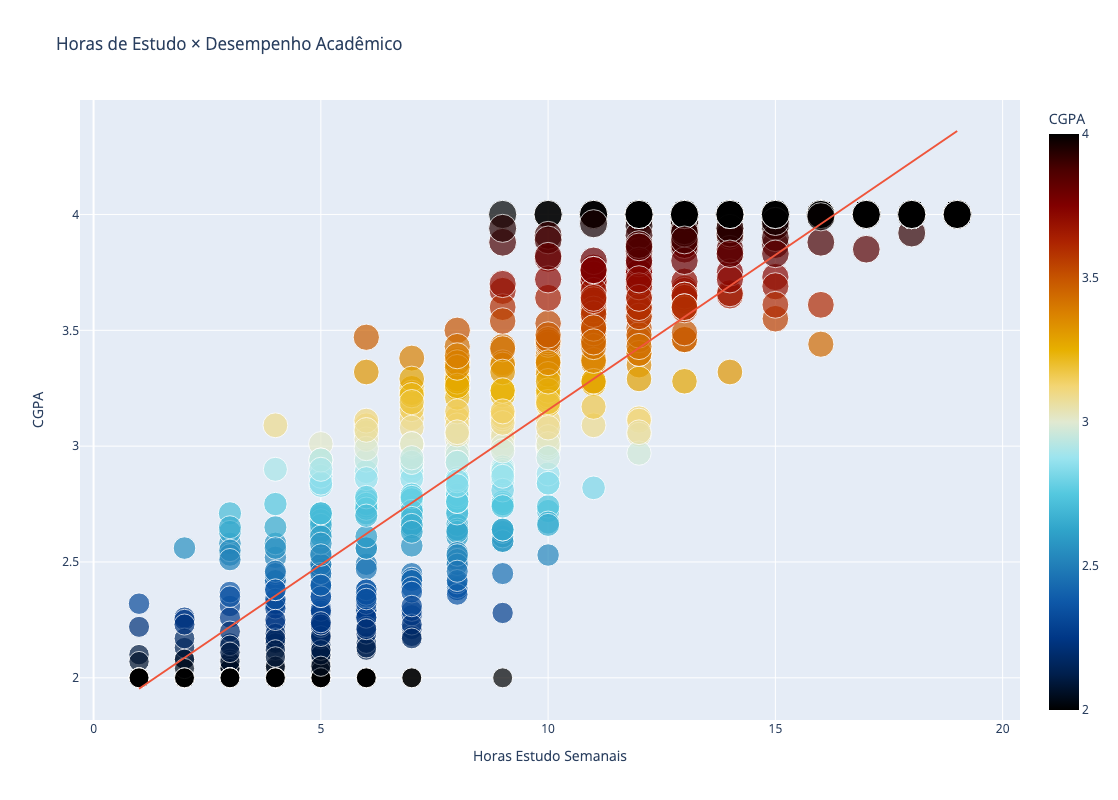

In [3]:
#| fig-cap: "Gráfico de dispersão mostrando como as CGPAs variam conforme as horas de estudo por semana"
fig = px.scatter(df, x="StudyHoursPerWeek", y="CGPA", color="CGPA",
                 color_continuous_scale=px.colors.cyclical.IceFire,
                 size='CGPA',
                 height=800,
                 trendline="ols",
                 title="Horas de Estudo × Desempenho Acadêmico")

fig.update_traces(hovertemplate='Horas de Estudo Semanal: %{x}<br>CGPA: %{y}')

fig.update_layout(
    xaxis_title="Horas Estudo Semanais",
    yaxis_title="CGPA"
)

fig.show()

### P2. Análise Explanatória Insight #2
**Alunos com Transtornos Mentais Por Cursos**

O gráfico evidencia que os cursos da área de exatas concentram a maior proporção de estudantes que relatam algum tipo de transtorno mental. Entre eles, o curso de Engenharia se destaca de forma expressiva, seguido pelo Bacharelado em Ciência da Computação e pelo Bacharelado em Tecnologia da Informação. O artigo “Mental health in undergraduate engineering students” (Mirabelli et al., publicado na Journal of Engineering Education) mostra que estudantes de engenharia apresentam níveis elevados de sofrimento psicológico e enfrentam barreiras significativas para buscar ajuda. Uma das principais conclusões é que a cultura acadêmica em engenharia normaliza o estresse e a sobrecarga, tratando-os como parte natural da formação profissional. Isso faz com que sintomas de ansiedade, depressão ou exaustão muitas vezes não sejam reconhecidos ou tratados adequadamente

Essa concentração pode estar associada a características típicas desses cursos: maior carga horária, conteúdos de alta complexidade e a exigência de longas jornadas de estudo. Tais fatores funcionam como potenciais gatilhos para quadros de ansiedade, depressão ou ataques de pânico, que são os transtornos identificados no dataset. A intensidade acadêmica, somada à pressão por desempenho, pode amplificar a vulnerabilidade desses estudantes.

Por outro lado, os cursos da área de humanas e religiosos também apresentam presença de transtornos mentais, mas em proporções mais reduzidas. Isso não significa ausência de desafios psicológicos, mas sugere que a natureza das atividades acadêmicas nesses campos que são frequentemente mais qualitativas e reflexivas e isso pode exercer menor pressão em termos de carga cognitiva intensa e horas de estudo contínuo.

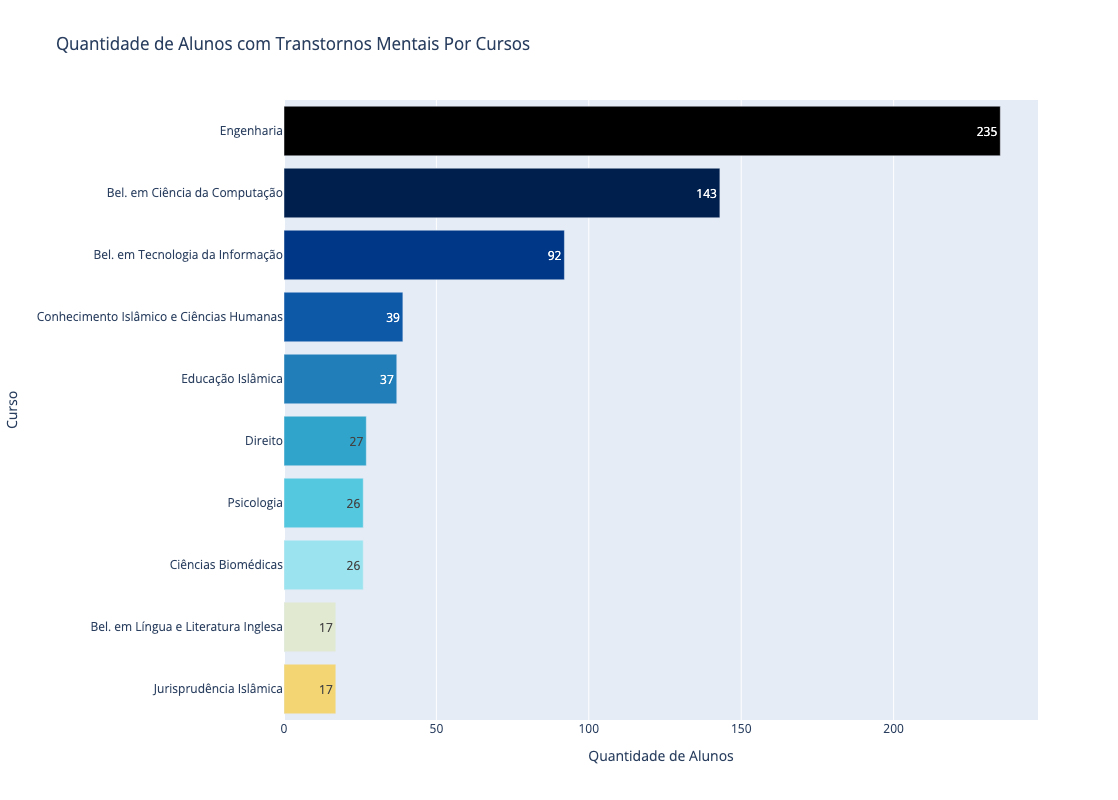

In [4]:
#| fig-cap: "Comparativo entre cursos quanto à quantidade de alunos com transtornos mentais"
mental_health_issues = df[(df['Depression'] == 1) | (df['Anxiety'] == 1) | (df['PanicAttack'] == 1)]
mental_health_counts = mental_health_issues.groupby('Course').size().reset_index(name='Count')
data = mental_health_counts.sort_values(by='Count', ascending=False).head(10)

fig = px.bar(data, x='Count', y='Course', orientation='h',
             color='Course',
             color_discrete_sequence=px.colors.cyclical.IceFire,
             text='Count',
             height=800,
             title='Quantidade de Alunos com Transtornos Mentais Por Cursos')


fig.update_traces(hovertemplate='Quantidade de Alunos: %{x}<br>Curso: %{y}')

fig.update_layout(
    xaxis_title="Quantidade de Alunos",
    yaxis_title="Curso",
    showlegend=False
)

fig.show()

### P3. Análise Explanatória Insight #3 
**Média de Engajamento Acadêmico por Ano de Estudo**

A análise dos cursos selecionados revela que o engajamento acadêmico ao longo dos anos não segue uma trajetória linear de crescimento ou queda. Em vez disso, observam-se flutuações que sugerem a influência de fatores específicos de cada etapa, como mudanças no currículo, características das turmas ou até mesmo a complexidade dos conteúdos oferecidos em cada período.

No 1º ano, o Bacharelado em Tecnologia da Informação se destaca com a maior média de engajamento, possivelmente impulsionado pelo entusiasmo inicial dos estudantes diante de conteúdos introdutórios e do contato com temas ligados à tecnologia. Em contraste, o curso de Engenharia apresenta o desempenho mais baixo, o que pode refletir tanto a dificuldade de adaptação dos ingressantes às disciplinas básicas quanto a exigência de uma carga horária intensa já no início da graduação.

No 3º ano, o Bacharelado em Tecnologia da Informação atinge um pico expressivo de engajamento, superando de forma notável os demais cursos. Esse aumento pode estar relacionado ao momento em que os estudantes começam a vivenciar projetos práticos e conteúdos mais aplicados, que fortalecem a conexão entre teoria e prática e elevam o envolvimento.

Já no 4º ano, ocorre uma inversão interessante: o curso de Engenharia assume a liderança em engajamento médio, sugerindo que os alunos atingem maior maturidade acadêmica e motivação ao se aproximarem da conclusão do curso. Nesse mesmo período, o Bacharelado em Ciência da Computação apresenta o menor resultado, o que pode indicar dificuldades ligadas à complexidade dos conteúdos avançados ou à pressão do mercado de trabalho, que se intensifica no final da graduação.

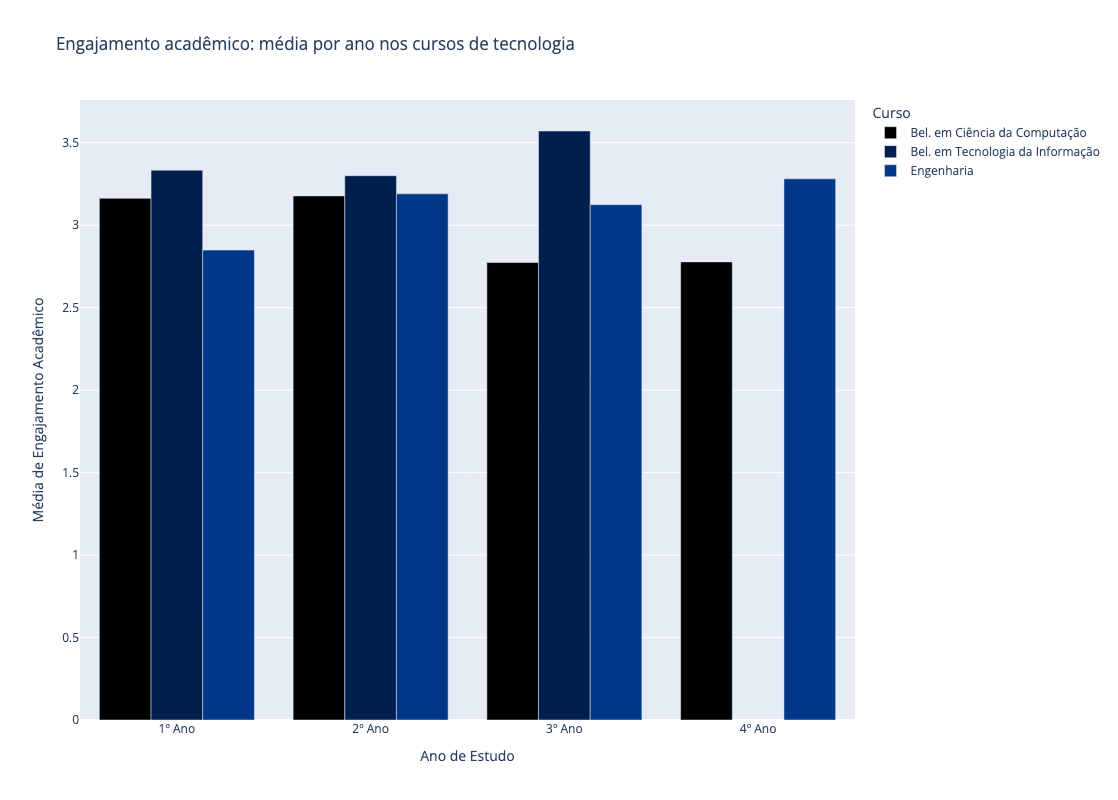

In [5]:
#| fig-cap: "Gráfico de barras mostrando o engajamento acadêmico médio por ano nos cursos de tecnologia."
selected_courses = ['Engenharia', 'Bel. em Tecnologia da Informação', 'Bel. em Ciência da Computação']
filtered_dt = df[df['Course'].isin(selected_courses)]

avg_academic_engagement_filtered = filtered_dt.groupby(['YearOfStudy', 'Course'])['AcademicEngagement'].mean().reset_index()

fig = px.bar(avg_academic_engagement_filtered, x='YearOfStudy', y='AcademicEngagement', color='Course',
             title='Engajamento acadêmico: média por ano nos cursos de tecnologia',
             barmode='group',
             custom_data=['Course'],
             height=800,
             color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(
    xaxis_title="Ano de Estudo",
    yaxis_title="Média de Engajamento Acadêmico",
    legend_title_text='Curso'
)

fig.update_traces(hovertemplate='Ano de Estudo: %{x}<br>Média de Engajamento Acadêmico: %{y:.2f}')

fig.show()